In [39]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV

from imblearn.pipeline import make_pipeline as make_pipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, accuracy_score

import joblib

In [22]:
# Import Dataset

df = pd.read_csv('../Resources/scaled_test_data.csv')
df_predict = pd.read_csv('../Resources/scaled_train_data.csv')

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.668541  0.543632 -0.642343 -0.485608 -1.177606  1.368234  4.469779   
1  2.243167 -1.595501 -1.059567 -1.313697 -1.115312 -0.114349 -1.109044   
2 -0.047465  0.595272  0.335003 -0.912183  0.126452 -0.295891  3.081703   
3 -2.125313 -0.649942 -0.469334 -2.101430 -0.467951 -0.366171  1.401330   
4 -1.282683  0.913228  1.175699 -0.671351  0.122953 -0.142584  0.293021   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0 -1.884671  0.326478  0.926309  ...  1.077266 -0.542111 -0.820649 -0.316626   
1 -0.071914 -0.622955  1.345755  ... -0.921283  0.292121  0.436634 -0.133822   
2 -1.559509  0.517402  0.297870  ...  1.239094 -0.290465  0.159091 -0.972055   
3 -0.350154 -1.064171  0.168998  ... -0.291232 -0.845514  0.690143 -0.138338   
4  0.706522 -0.381651 -0.797069  ... -1.552836 -0.074099 -0.560995  0.234917   

        V26       V27       V28  Class  scaled_amount  scaled_time  

In [23]:
print(df['Class'].value_counts())
print(df_predict['Class'].value_counts())

Class
0    112585
1       132
Name: count, dtype: int64
Class
0    171730
1       360
Name: count, dtype: int64


<Axes: title={'center': 'Distribution \n 0: No Fraud 1: Fraud'}, xlabel='Class', ylabel='Count'>

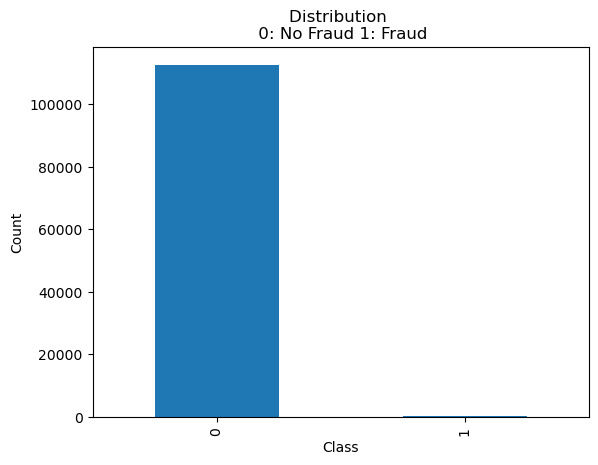

In [24]:
df['Class'].value_counts().plot(kind='bar', title='Distribution \n 0: No Fraud 1: Fraud', ylabel='Count')

In [25]:
print(f'Frauds {round(df["Class"].value_counts()[1] / len(df) * 100, 2)}% of the dataset')
print(f'No Frauds {round(df["Class"].value_counts()[0] / len(df) * 100, 2)}% of the dataset')

Frauds 0.12% of the dataset
No Frauds 99.88% of the dataset


In [26]:
X = df.drop('Class', axis=1)
y = df['Class']

kfold = StratifiedKFold(n_splits=5)

for train_index, test_index in kfold.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

display(X)

display(y)

Train: [ 22538  22539  22540 ... 112714 112715 112716] Test: [    0     1     2 ... 27806 29008 29511]
Train: [     0      1      2 ... 112714 112715 112716] Test: [22538 22539 22540 ... 51276 51482 51488]
Train: [     0      1      2 ... 112714 112715 112716] Test: [45077 45078 45079 ... 68132 69164 69355]
Train: [     0      1      2 ... 112714 112715 112716] Test: [67628 67629 67630 ... 90179 90180 90181]
Train: [    0     1     2 ... 90179 90180 90181] Test: [ 82254  82305  83313 ... 112714 112715 112716]
(90174, 30)
(22543, 30)
(90174,)
(22543,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.668541,0.543632,-0.642343,-0.485608,-1.177606,1.368234,4.469779,-1.884671,0.326478,0.926309,...,-0.252996,1.077266,-0.542111,-0.820649,-0.316626,0.822236,-0.439611,-0.807790,7.870712,-1.005898
1,2.243167,-1.595501,-1.059567,-1.313697,-1.115312,-0.114349,-1.109044,-0.071914,-0.622955,1.345755,...,-0.541533,-0.921283,0.292121,0.436634,-0.133822,-0.340481,0.010053,-0.045364,0.279406,-1.005857
2,-0.047465,0.595272,0.335003,-0.912183,0.126452,-0.295891,3.081703,-1.559509,0.517402,0.297870,...,0.067060,1.239094,-0.290465,0.159091,-0.972055,0.009949,-0.662520,-0.747998,3.159839,-1.005857
3,-2.125313,-0.649942,-0.469334,-2.101430,-0.467951,-0.366171,1.401330,-0.350154,-1.064171,0.168998,...,-0.249809,-0.291232,-0.845514,0.690143,-0.138338,-0.575835,0.195512,-0.593574,4.155951,-1.005857
4,-1.282683,0.913228,1.175699,-0.671351,0.122953,-0.142584,0.293021,0.706522,-0.381651,-0.797069,...,-0.462616,-1.552836,-0.074099,-0.560995,0.234917,-0.073150,0.099604,0.012179,-0.031107,-1.005816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112712,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.298014,1.116932
112713,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.035551,1.116972
112714,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.633940,1.117013
112715,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.169838,1.117013


0         0
1         0
2         0
3         0
4         0
         ..
112712    0
112713    0
112714    0
112715    0
112716    0
Name: Class, Length: 112717, dtype: int64

In [29]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:132]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


under_sampled_df = normal_distributed_df.sample(frac=1, random_state=42)

under_sampled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
10902,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,...,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,1,-0.263991,-0.815162
91041,2.002669,0.082512,-1.635543,1.416330,0.280641,-1.180629,0.560463,-0.338437,0.425750,0.295840,...,0.245532,0.004684,-0.047776,0.402944,-0.485857,-0.026827,-0.062975,0,-0.010276,0.626556
79387,-1.067713,5.262312,-8.438567,7.316487,0.008254,-2.125936,-3.307036,1.869838,-4.522584,-5.172812,...,-0.491960,0.055914,-1.145369,0.068951,0.535055,0.539263,0.124255,1,-0.298014,0.403178
100770,-0.156908,1.264823,0.767851,2.842615,1.094444,-0.007253,1.666220,-0.435447,-1.571359,0.991554,...,-0.383680,0.138012,-0.157680,-0.350700,-0.370187,-0.213966,-0.205404,0,0.613109,0.810288
19177,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,1.713538,...,1.018191,0.303550,0.833886,-1.222306,2.745261,-0.220402,0.168233,1,-0.208999,-0.668783


<Axes: title={'center': 'Distribution \n 0: No Fraud 1: Fraud'}, xlabel='Class', ylabel='Count'>

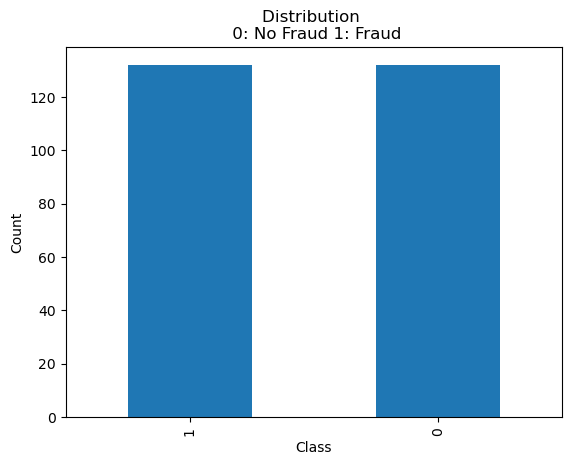

In [30]:
under_sampled_df['Class'].value_counts().plot(kind='bar', title='Distribution \n 0: No Fraud 1: Fraud', ylabel='Count')

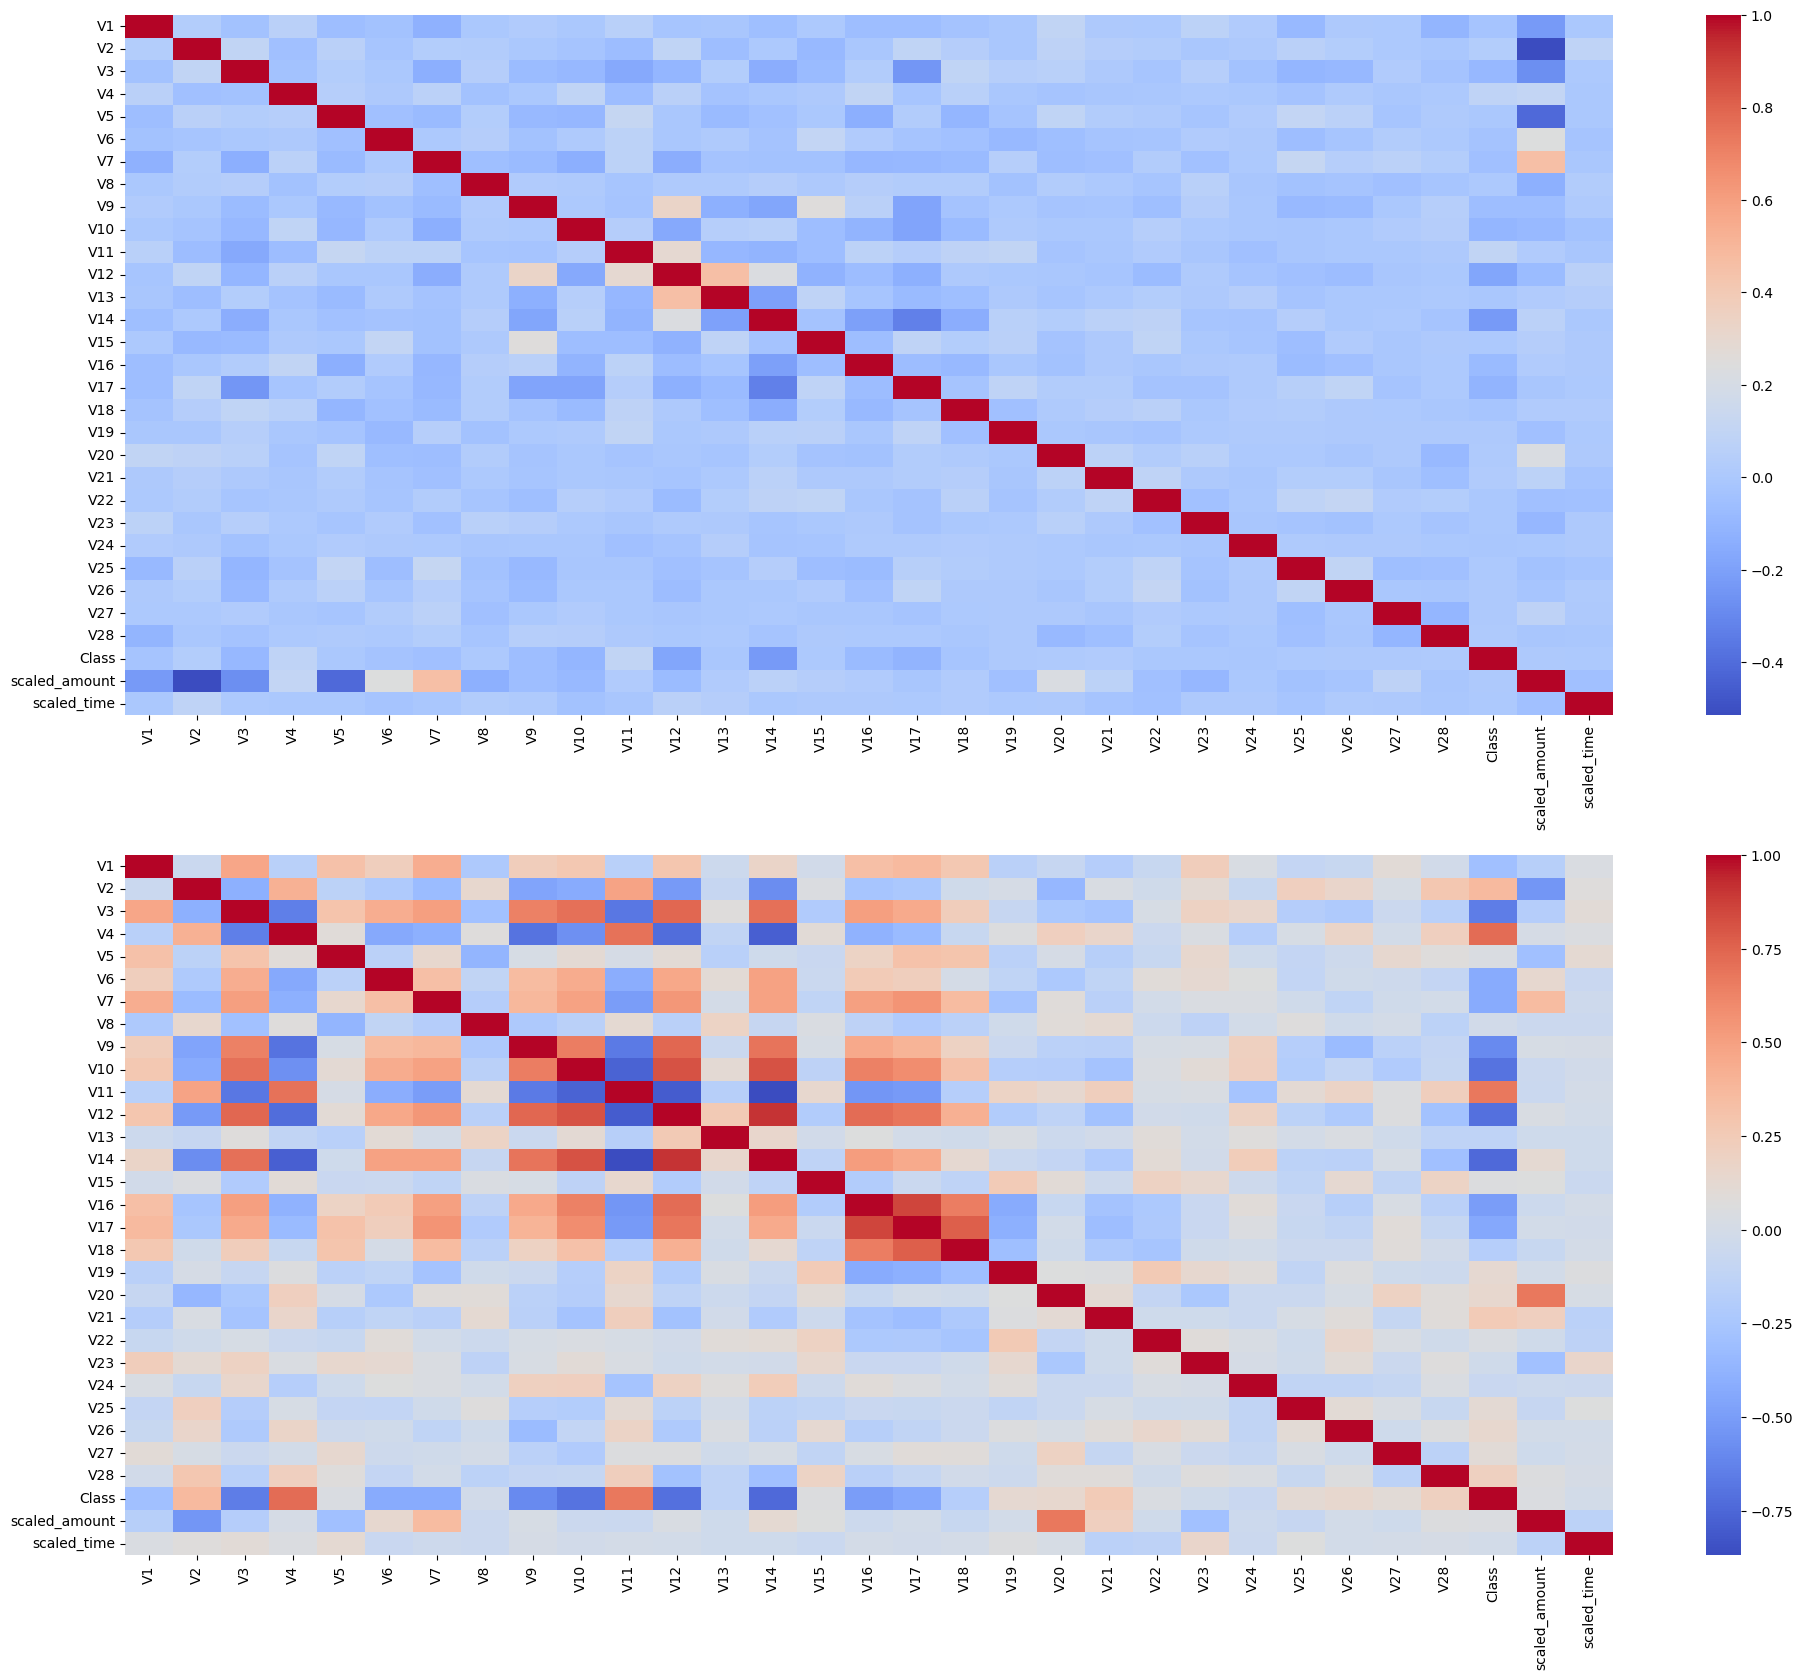

In [31]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', ax=ax1)

under_sampled_corr = under_sampled_df.corr()
sns.heatmap(under_sampled_corr, cmap='coolwarm', ax=ax2)

plt.show()

In [32]:
under_sampled_corr = under_sampled_df.corr().abs()

under_sampled_corr

threshold = 0.8

highly_corr_features = np.where(under_sampled_corr > threshold)

highly_corr_features = [(under_sampled_corr.index[x], under_sampled_corr.columns[y]) for x, y in zip(*highly_corr_features) if x != y and x < y]

highly_corr_features

[('V10', 'V12'),
 ('V10', 'V14'),
 ('V11', 'V14'),
 ('V12', 'V14'),
 ('V16', 'V17')]

In [ ]:
# X = sm.add_constant(under_sampled_df)

# X

# vif = pd.DataFrame()
# vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['features'] = X.columns

# vif.sort_values('VIF Factor', ascending=False)

In [48]:
models = {
    #'Logistic Regression': LogisticRegression(), # Worst result
    #'Decision Tree': DecisionTreeClassifier(), # Worst result
    'Random_Forest': RandomForestClassifier(),
    'XGB_Classifier': xgb.XGBClassifier(),
    #'Gradient_Boosting': GradientBoostingClassifier(),
    #'Support Vector Machine': SVC(),
    'Extra_Trees_Classifier': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


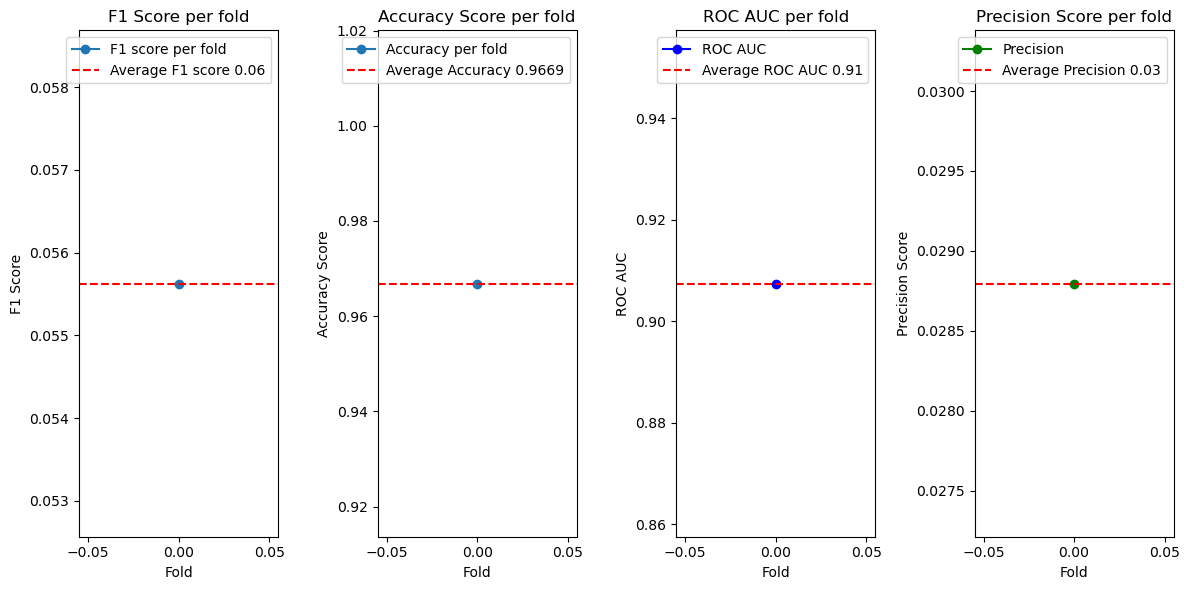

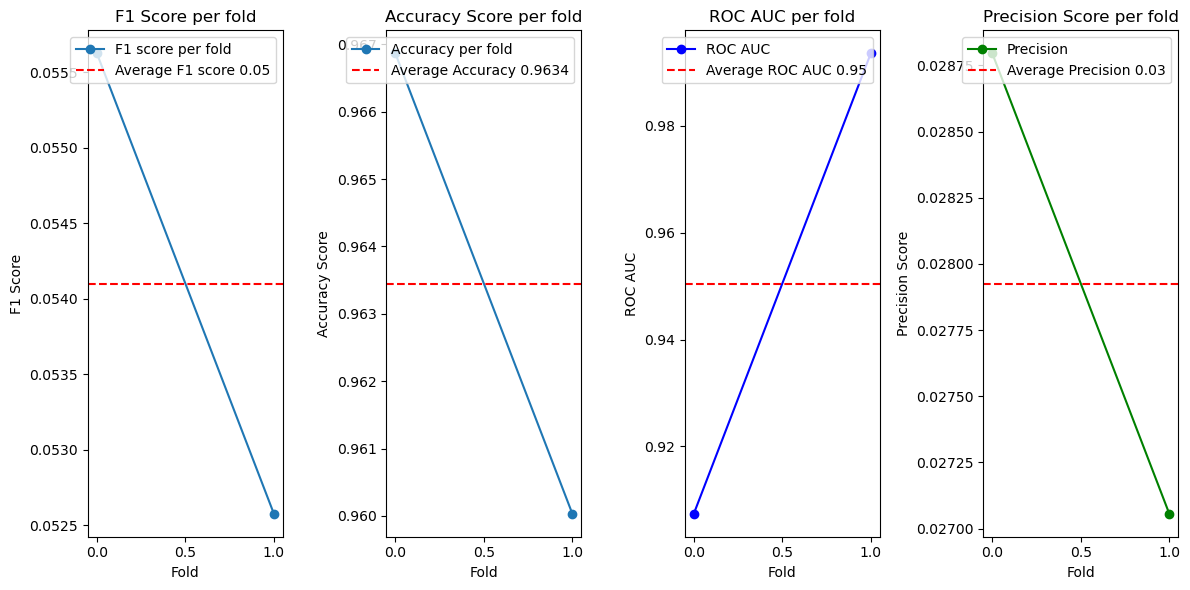

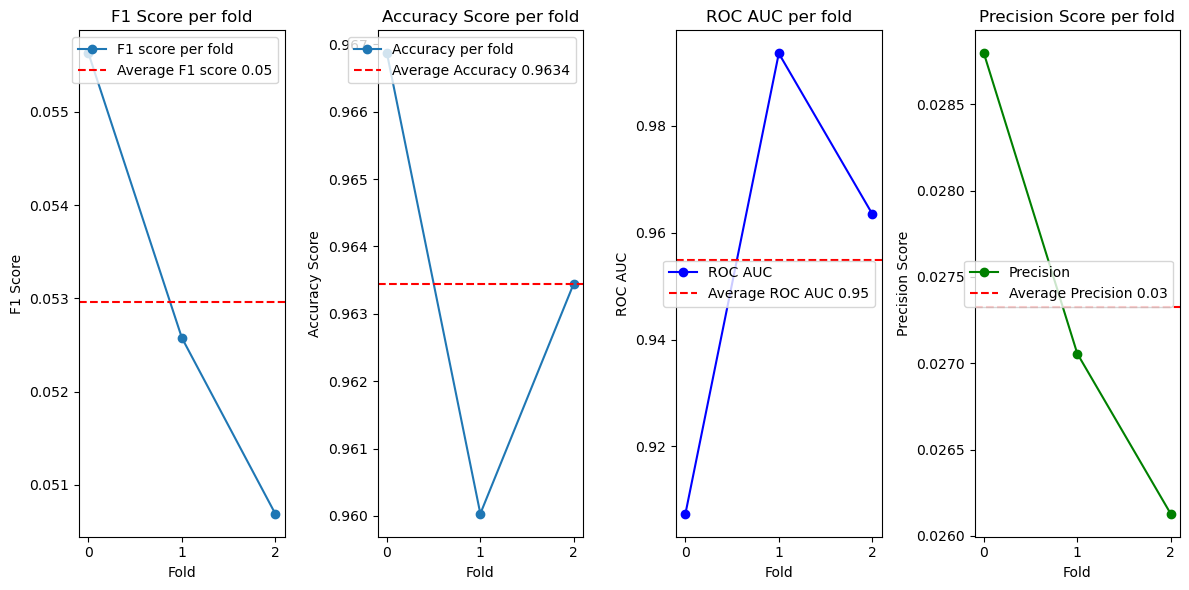

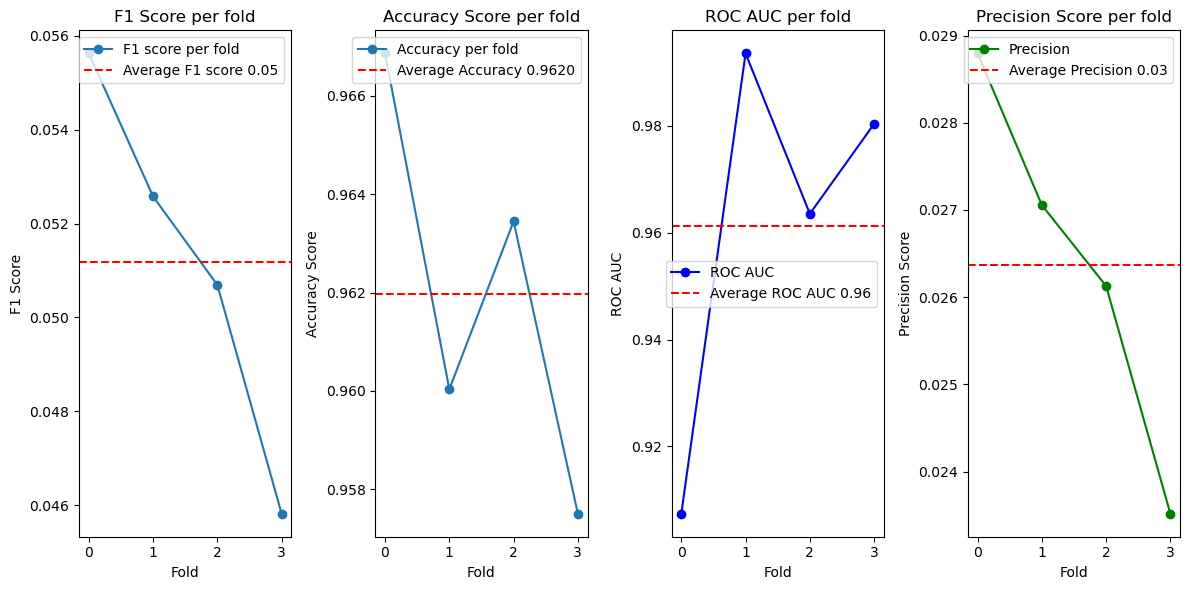

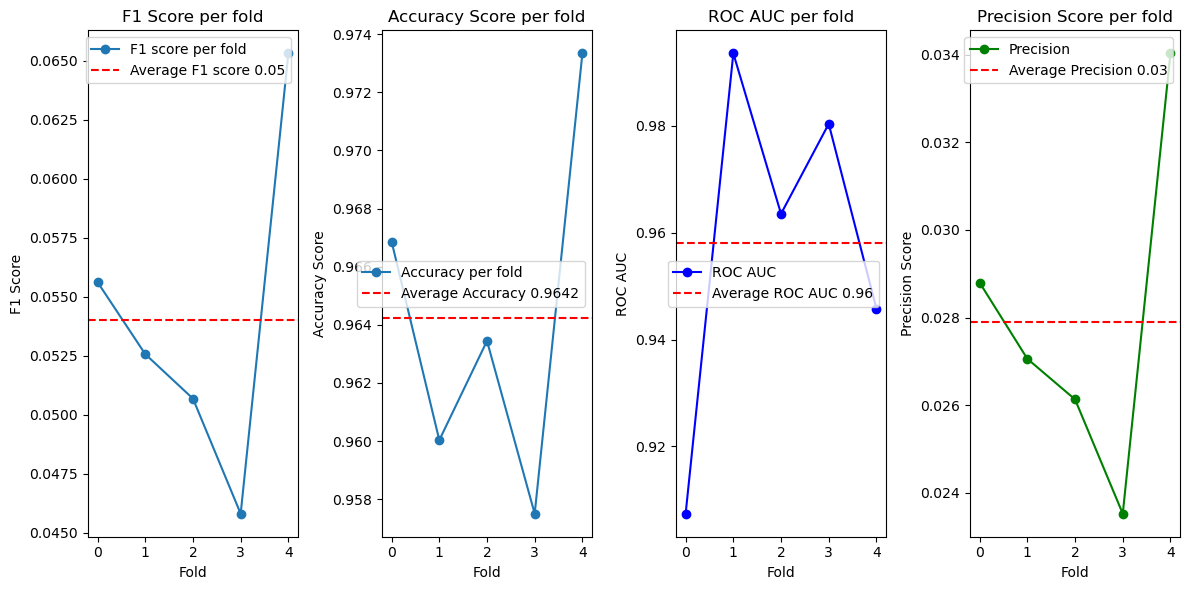

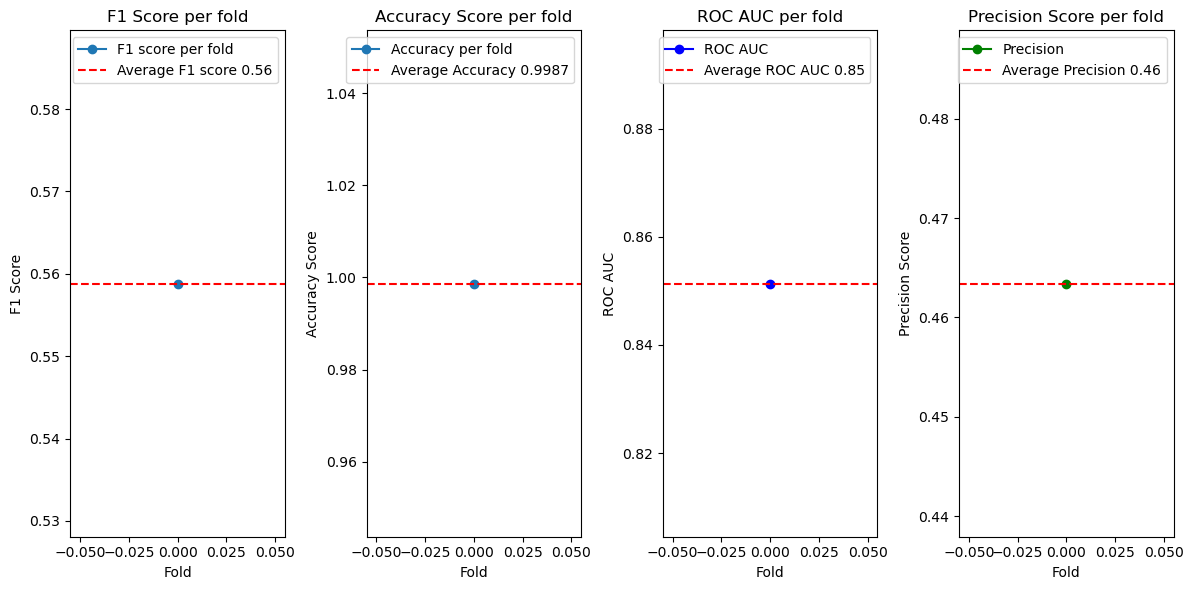

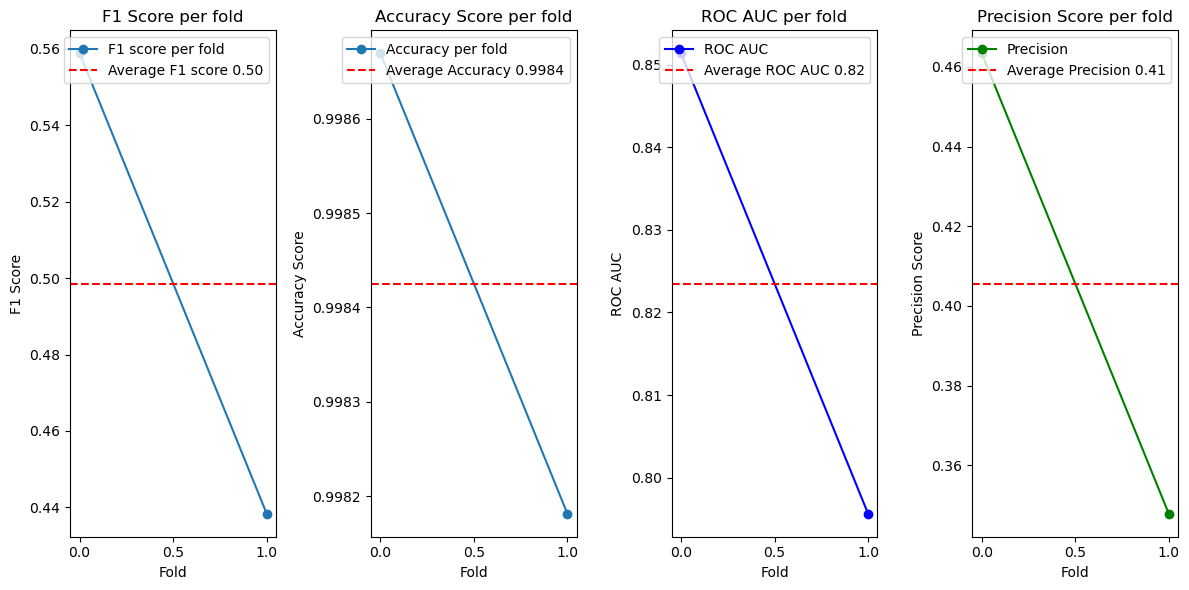

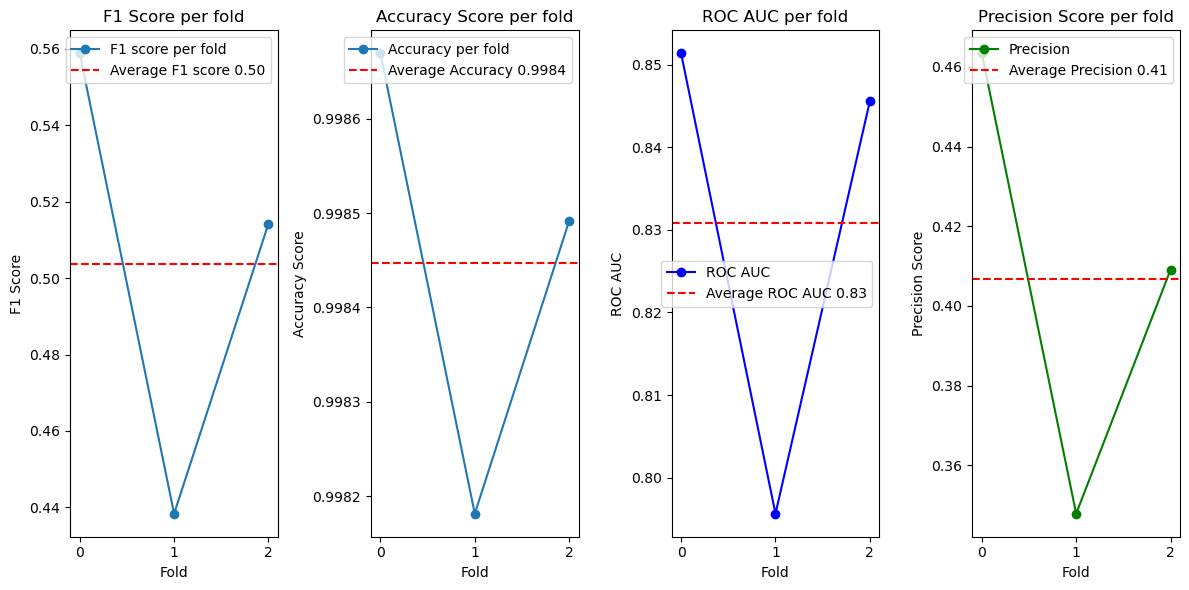

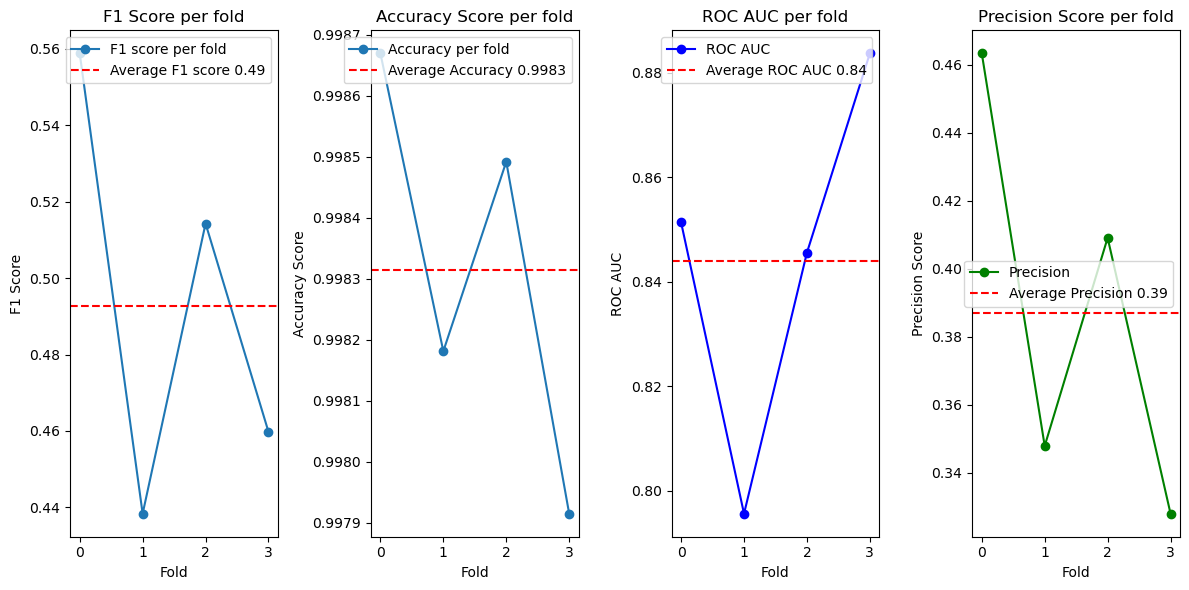

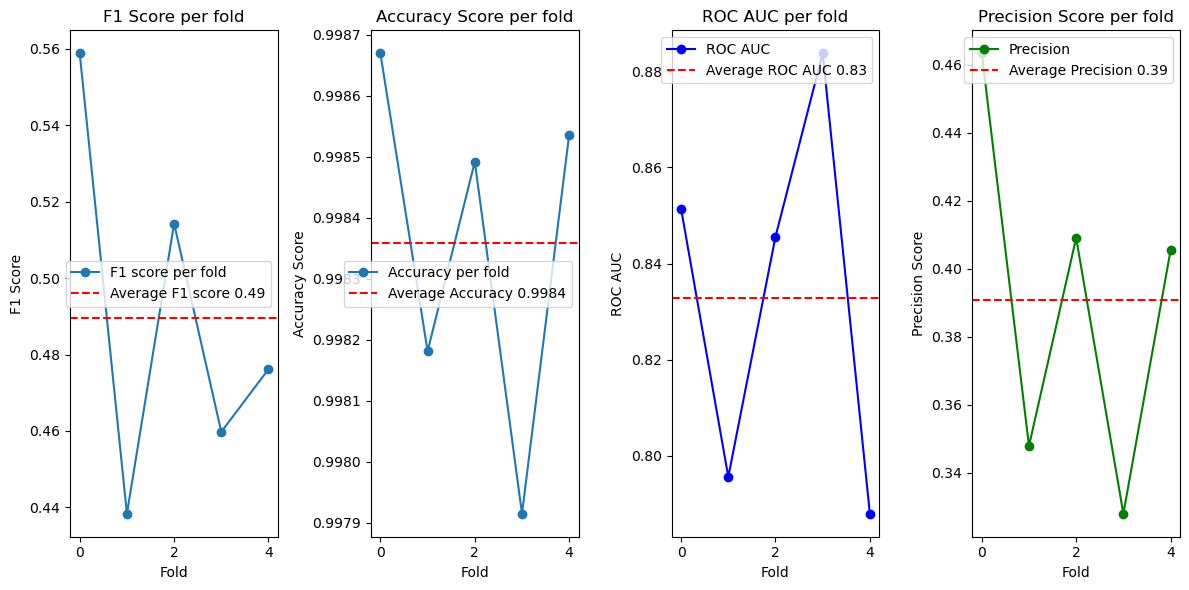

KeyboardInterrupt: 

In [34]:
X = df.drop('Class', axis=1)
y = df['Class']

stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

smote = SMOTE(random_state=42)

for model_name, model in models.items():

    accuracy_scores = []
    f1_scores = []
    roc_auc_scores = []
    precision_scores = []
    confusion_matrices = []

    # Cross-validation
    for train_index, test_index in stratified_k_fold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # display(X_train.shape)
        # display(y_train.shape)
        
        # display(y_train.value_counts())
        
        # Apply SMOTE to training data
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
        # display(X_train_res.shape)
        # display(y_train_res.shape)
        
        # display(y_train_res.value_counts())
        
        # Train the model
        model.fit(X_train_res, y_train_res)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Metrics
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        roc_auc_scores.append(roc_auc)
        precision_scores.append(precision)
        confusion_matrices.append(conf_matrix)

        # Average metrics
        average_f1 = np.mean(f1_scores)
        average_roc_auc = np.mean(roc_auc_scores)
        average_precision = np.mean(precision_scores)

        # Combined Confusion Matrix
        combined_conf_matrix = np.sum(confusion_matrices, axis=0)

        # F1 Score across all folds and average values
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 4, 1)
        plt.plot(f1_scores, label='F1 score per fold', marker='o')
        plt.axhline(y=average_f1, color='red', linestyle='--', label=f'Average F1 score {average_f1:.2f}')
        plt.title('F1 Score per fold')
        plt.xlabel('Fold')
        plt.ylabel('F1 Score')
        plt.legend()

        # Accuracy Score across all folds and average values
        plt.subplot(1, 4, 2)
        plt.plot(accuracy_scores, label='Accuracy per fold', marker='o')
        plt.axhline(y=np.mean(accuracy_scores), color='red', linestyle='--', label=f'Average Accuracy {np.mean(accuracy_scores):.4f}')
        plt.title('Accuracy Score per fold')
        plt.xlabel('Fold')
        plt.ylabel('Accuracy Score')
        plt.legend()

        # ROC AUC Score across all folds and average values
        plt.subplot(1, 4, 3)
        plt.plot(roc_auc_scores, label='ROC AUC', color='blue', marker='o')
        plt.axhline(y=average_roc_auc, color='red', linestyle='--', label=f'Average ROC AUC {average_roc_auc:.2f}')
        plt.title('ROC AUC per fold')
        plt.xlabel('Fold')
        plt.ylabel('ROC AUC')
        plt.legend()

        # Precision Score across all folds and average values
        plt.subplot(1, 4, 4)
        plt.plot(precision_scores, label='Precision', color='green', marker='o')
        plt.axhline(y=average_precision, color='red', linestyle='--', label=f'Average Precision {average_precision:.2f}')  
        plt.title('Precision Score per fold')
        plt.xlabel('Fold')
        plt.ylabel('Precision Score')
        plt.legend()

        plt.tight_layout()
        plt.show()

In [49]:
X = df.drop('Class', axis=1)
y = df['Class']

stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

smote = SMOTE(random_state=42)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for model_name, model in models.items():

    accuracy_scores = []
    f1_scores = []
    roc_auc_scores = []
    precision_scores = []
    confusion_matrices = []
        
    # Apply SMOTE to training data
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
    # Train the model
    model.fit(X_train_res, y_train_res)
        
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
        
    # Metrics
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    class_report = classification_report(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Precision: {precision}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print("\n")
    
    joblib.dump(model, f'{model_name}.joblib')

Model: Random_Forest
F1 Score: 0.7941176470588235
Accuracy: 0.9995031937544357
ROC AUC: 0.9813691293980166
Precision: 0.84375
Confusion Matrix:
[[28139     5]
 [    9    27]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28144
           1       0.84      0.75      0.79        36

    accuracy                           1.00     28180
   macro avg       0.92      0.87      0.90     28180
weighted avg       1.00      1.00      1.00     28180



Model: XGB_Classifier
F1 Score: 0.8108108108108109
Accuracy: 0.9995031937544357
ROC AUC: 0.9820397874423599
Precision: 0.7894736842105263
Confusion Matrix:
[[28136     8]
 [    6    30]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28144
           1       0.79      0.83      0.81        36

    accuracy                           1.00     28180
   macro avg       0.89      0.92      0.91  

In [50]:
for model_name, model in models.items():
    loaded_model = joblib.load(f'{model_name}.joblib')

    X_test_rfc = df_predict.drop('Class', axis=1)
    y_test_rfc = df_predict['Class']

    y_pred = loaded_model.predict(X_test_rfc)
    y_prob = loaded_model.predict_proba(X_test_rfc)[:, 1]

    # Metrics
    f1 = f1_score(y_test_rfc, y_pred)
    accuracy = accuracy_score(y_test_rfc, y_pred)
    roc_auc = roc_auc_score(y_test_rfc, y_prob)
    precision = precision_score(y_test_rfc, y_pred)
    conf_matrix = confusion_matrix(y_test_rfc, y_pred)

    class_report = classification_report(y_test_rfc, y_pred)

    print(f"Model: {model_name}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Precision: {precision}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print("\n")

Model: Random_Forest
F1 Score: 0.7664670658682635
Accuracy: 0.9990934975884711
ROC AUC: 0.9659370652898285
Precision: 0.8311688311688312
Confusion Matrix:
[[171678     52]
 [   104    256]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171730
           1       0.83      0.71      0.77       360

    accuracy                           1.00    172090
   macro avg       0.92      0.86      0.88    172090
weighted avg       1.00      1.00      1.00    172090



Model: XGB_Classifier
F1 Score: 0.803788903924222
Accuracy: 0.9991574176303097
ROC AUC: 0.9753053889503548
Precision: 0.783641160949868
Confusion Matrix:
[[171648     82]
 [    63    297]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171730
           1       0.78      0.82      0.80       360

    accuracy                           1.00    172090
   macro avg       0.89     

In [17]:
# Select the best hyperparameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=20, max_samples=0.8, n_jobs=-1, class_weight='balanced', max_depth=5, max_features='sqrt')
param_grid = { 'max_depth': list(range(1, 11)) }
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='f1')

random_search.fit(X_train, y_train)

print("Best max_depth:", random_search.best_params_['max_depth'])
print("Best F1 score:", random_search.best_score_)

Best max_depth: 6
Best F1 score: 0.8048724146285122


In [44]:
# Train RandomForestClassifier
X = df.drop('Class', axis=1)
y = df['Class']

model = RandomForestClassifier()

stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

smote = SMOTE(random_state=42)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
precision_scores = []
confusion_matrices = []
        
# Apply SMOTE to training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        
# Train the model
model.fit(X_train_res, y_train_res)
        
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
        
# Metrics
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
    
class_report = classification_report(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print("\n")

joblib.dump(model, 'random_forest_classifier_model.joblib')

F1 Score: 0.8235294117647058
Accuracy: 0.9995741660752306
ROC AUC: 0.9518429031646768
Precision: 0.875
Confusion Matrix:
[[28140     4]
 [    8    28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28144
           1       0.88      0.78      0.82        36

    accuracy                           1.00     28180
   macro avg       0.94      0.89      0.91     28180
weighted avg       1.00      1.00      1.00     28180





['random_forest_classifier_model.joblib']

In [47]:
# Test RandomForestClassifier
loaded_model = joblib.load('random_forest_classifier_model.joblib')

X_test_rfc = df_predict.drop('Class', axis=1)
y_test_rfc = df_predict['Class']

y_pred = loaded_model.predict(X_test_rfc)
y_prob = loaded_model.predict_proba(X_test_rfc)[:, 1]

# Metrics
f1 = f1_score(y_test_rfc, y_pred)
accuracy = accuracy_score(y_test_rfc, y_pred)
roc_auc = roc_auc_score(y_test_rfc, y_prob)
precision = precision_score(y_test_rfc, y_pred)
conf_matrix = confusion_matrix(y_test_rfc, y_pred)

class_report = classification_report(y_test_rfc, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print("\n")

F1 Score: 0.7804154302670623
Accuracy: 0.9991399848916265
ROC AUC: 0.9631534320671339
Precision: 0.8375796178343949
Confusion Matrix:
[[171679     51]
 [    97    263]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171730
           1       0.84      0.73      0.78       360

    accuracy                           1.00    172090
   macro avg       0.92      0.87      0.89    172090
weighted avg       1.00      1.00      1.00    172090



